# Карта Москвы

In [228]:
import pandas as pd
import numpy as np
import geopandas as gpd
import random
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
mo_gdf = gpd.read_file('mo.shp')#прочитать shape -- это файл датафрейма с соответствующей ему контурной картой
mo_gdf

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."
5,Вороновское,45298553,45943000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9700765 55.3548495, 36.9703153 55..."
6,Михайлово-Ярцевское,45298564,45951000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((37.0527376 55.3947315, 37.0548294 55..."
7,Марушкинское,45297562,45949000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.0869749 55.5903604, 37.0949245 55..."
8,Первомайское,45298572,45955000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((37.0922795 55.4649172, 37.0933611 55..."
9,Матушкино,45272562,45331000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((37.1785294 56.0079518, 37.1808275 56..."


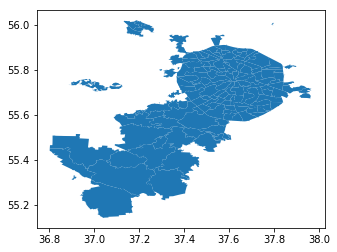

In [5]:
mo_gdf.plot() #посмотреть шейп

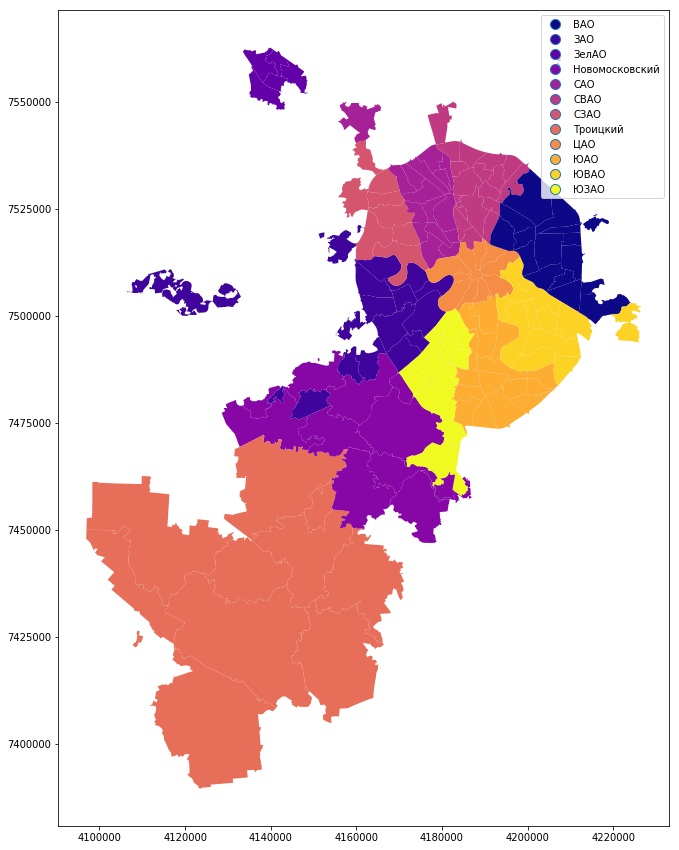

In [7]:
mo_gdf_wm = mo_gdf.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции via https://habr.com/ru/company/ods/blog/338554/
mo_gdf_wm.plot(column = 'ABBREV_AO', linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15])

Ещё можно делать интерактивную визуализацию на шейпах Москвы, но у меня времени, опять же, не хватило))))) В проекции гугл-карт карта Москвы выглядит вот так, как выше. 

In [8]:
df=pd.read_csv('sample.csv',delimiter=";",error_bad_lines=False) #Датасет компаний, СПАРК-Интерфакс, мой личный доступ

In [11]:
from bs4 import BeautifulSoup as bs
import requests
def get_location(place): #Функция запроса к Яндекс-API для получения координат по текстовому адресу
    try:
        params={'geocode': place}
        raw=requests.get('https://geocode-maps.yandex.ru/1.x/', params)
        refined=bs(raw.text, features='xml')
        point=refined.pos.string
        return point
    except AttributeError:
        return 0

In [13]:
df.head()

,Наименование,Регистрационный номер,Описание сайта по Python,Комментарий,Релевантность сайта ОКВЭД,Краткое наименование,Адрес (место нахождения),Телефон,Электронный адрес,Сайт в сети Интернет,...,Общий ОКВЭД,Код основного вида деятельности,Форма собственности,Код ОКФС,Размер компании,Среднесписочная численность работников,Важная информация,Выручка,Чистая прибыль,Координаты
0,"ЛУКОЙЛ, ПАО",1027700035769,NaN,NaN,NaN,"ПАО ""ЛУКОЙЛ""","101000, г. Москва, бульвар Сретенский, д. 11","+7 (495) 6219501, +7 (495) 6219906, +7 (495) 6...","info@lukoil.ru, ir@lukoil.com, pr@lukoil.com","www.lukoil.com, www.lukoil.ru",...,70,70.10.2,Частная собственность,16,Крупные предприятия,1 001 - 5 000,NaN,223 419 850 000,204 363 706 000,0
1,"МЭЙЛ.РУ, ООО",1027739850962,NaN,NaN,1.0,"ООО ""МЭЙЛ.РУ""","125167, г. Москва, проспект Ленинградский, д. ...","+7 (495) 7256357, +7 (495) 7256359","avto.mail@corp.mail.ru, rabota.mail@corp.mail....","www.gogo.ru, www.mail.ru, www.molotok.ru, www....",...,63,63.11.1,Частная собственность,16,Крупные предприятия,1 001 - 5 000,NaN,39 306 265 000,4 130 925 000,0
2,"ВЕРТОЛЕТЫ РОССИИ, АО",1077746003334,NaN,NaN,NaN,"АО ""ВЕРТОЛЕТЫ РОССИИ""","115054, г. Москва, ул. Пионерская Б, д. 1","+7 (495) 2135968, +7 (495) 6493349, +7 (495) 7...","3004813@bk.ru, a.akartsev@rus-helicopters.com,...","www.russianhelicopters.aero/ru, www.russianhel...",...,70,70.10.1,Частная собственность,16,Крупные предприятия,501 - 1 000,NaN,36 256 548 000,15 710 999 000,0
3,"СИБИНТЕК, ООО ИК",1027700251314,NaN,NaN,1.0,"ООО ИК ""СИБИНТЕК""","117152, г. Москва, шоссе Загородное, д. 1 корп...","+7 (3463) 331111, +7 (3463) 333111, +7 (3463) ...",info@sibintek.ru,www.sibintek.ru,...,63,63.11.1,Частная собственность,16,Крупные предприятия,13918,NaN,32 586 832 000,2 090 653 000,0
4,"СБЕРТЕХ, АО",1117746533926,NaN,NaN,NaN,"АО ""СБЕРТЕХ""","117105, г. Москва, набережная Новоданиловская,...","+7 (495) 6680909, +7 (495) 6690808, +7 (903) 2...",nvkostina.sbt@sberbank.ru,sberbank-tech.ru,...,62,62.01,Частная собственность,16,Крупные предприятия,9534,NaN,30 319 977 000,151 985 000,0


Теперь порисуем на карте. 

Теперь для каждой точки по её адресу получим координаты.

In [20]:
cheers=['Не злись, до конца осталось всего', 'Можно было бы и пооптимальнее, но уже прошло целых', 'Я сходил покурить уже три раза, а осталось до финиша']
for i, items in enumerate(df['Адрес (место нахождения)']): #получаем координаты через Яндекс-API
    df['Координаты'][i]=get_location(items)
    if i%100==0:
        print(i)
        

C:\Users\Dmitry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700


In [21]:
df['Координаты'].describe()

count     5591
unique    3777
top          0
freq        72
Name: Координаты, dtype: int64

In [23]:
df.to_excel('coord1.xlsx') #Сохраняем координаты на всякий случай

In [24]:
geo=df[df['Координаты']!=0].copy() #копируем датафрейм

In [28]:
from shapely.geometry import Point
for i, items in enumerate (geo['Координаты']): #приводим координаты в нужный формат
    print(i)
    geo['Координаты'][i]=Point(float(items.split(" ")[0]), float(items.split(" ")[1]))

0


C:\Users\Dmitry\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313


3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955


5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518


In [31]:
geo=geo.reset_index(drop=True) 

In [241]:
geo.columns

Index(['Наименование', 'Регистрационный номер', 'Описание сайта по Python',
       'Комментарий', 'Релевантность сайта ОКВЭД', 'Краткое наименование',
       'Адрес (место нахождения)', 'Телефон', 'Электронный адрес',
       'Сайт в сети Интернет', 'Дата регистрации', 'Возраст компании',
       'Статус', 'Код налогоплательщика', 'Регион регистрации',
       'Вид деятельности/отрасль', 'Общий ОКВЭД',
       'Код основного вида деятельности', 'Форма собственности', 'Код ОКФС',
       'Размер компании', 'Среднесписочная численность работников',
       'Важная информация', 'Выручка', 'Чистая прибыль', 'Координаты',
       'Округ'],
      dtype='object')

In [37]:
geo['Округ']=0
for i in range (0, 5519): #Для каждого объекта присваиваем координатам округ Москвы. Последний индекс -- количество компаний Москвы в базе
    for j in range (0, 146): #Последний индекс -- число округов Москвы
        if type(geo['Координаты'][i])==Point:
            if geo['Координаты'][i].intersects(mo_gdf['geometry'][j]):
                geo['Округ'][i]=mo_gdf['NAME'][j]

C:\Users\Dmitry\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dmitry\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
geo=geo[geo['Округ']!=0] #Убираем что-то, где округ не определился

In [34]:
from shapely.geometry import Point
for i, items in enumerate (geo['Координаты']):
    if type(items)!=Point:
        print(i)
        geo['Координаты'][i]=Point(float(items.split(" ")[0]), float(items.split(" ")[1]))

161
162


C:\Users\Dmitry\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412


2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224


3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882


5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518


In [46]:
regional1=pd.pivot_table(geo, index='Округ', columns='Общий ОКВЭД', aggfunc='count', fill_value=0)


In [52]:
regional1.iloc[:, 0:6]


Адрес (место нахождения)                    
Общий ОКВЭД                                 62  63  69  70  71  73
Округ                                                             
"Мосрентген"                                 1   0   0   0   0   0
Академический                               14  11  10   8  17   7
Алексеевский                                30   4   9   7  21   9
Алтуфьевский                                 0   3   1   0   2   2
Арбат                                       11   5  16   9   9   5
Аэропорт                                    24   2   9  12  15   8
Бабушкинский                                 3   3   2   2  15   9
Басманный                                   91  25  62  42  87  63
Беговой                                     15   3  18  10  14  18
Бескудниковский                             10   1   3   1   3   1
Бибирево                                     3   0   1   0   0   0
Бирюлёво Восточное                           4   0   4   1   4   2
Бирюлёво Западное                            2   0   1   0   1   2
Богородское                                 18   0   4   4   5   4
Братеево                                     0   0   1   0   0   0
Бутырский                                   23   5  13   5  16  13
Вешняки                                      1   0   3   0   2   2
Внуково                                      1   0   0   0   0   0
Внуковское                                   1   0   0   0   0   0
Войковский                                  11   0   2   2   8   6
Восточное Дегунино                           1   2   2   1   5   2
Восточное Измайлово                          4   0   1   1  10   1
Восточный                                    0   0   0   0   1   0
Выхино-Жулебино                              5   2   4   5  10   6
Гагаринский                                  7   5   7   3  15   2
Головинский                                  4   0   4   2   4   4
Гольяново                                    4   1   6   3   9   1
Даниловский                                 86  12  35  32  48  46
Дмитровский                                  0   0   0   0   4   2
Донской                                     40   7  21  13  25  28
...                                        ...  ..  ..  ..  ..  ..
Сосенское                                    1   0   2   4   2   0
Старое Крюково                               8   2   1   0   4   2
Строгино                                     4   0   0   3   2   1
Таганский                                   41  21  44  24  42  20
Тверской                                    66  24  57  45  39  35
Текстильщики                                 5   1   0   2  10   2
Тимирязевский                               14   3   5   2  10   4
Троицк                                       2   0   1   2   4   1
Тропарёво-Никулино                           5   0   2   2   9   2
Тёплый Стан                                  1   0   1   0   3   0
Фили-Давыдково                               4   5   4   3   6   5
Филёвский Парк                              12   3   6   6  13  10
Хамовники                                   39  13  30  30  37  30
Ховрино                                      5   1   2   7   1   1
Хорошёво-Мнёвники                           14   5   8   6  17   8
Хорошёвский                                 31   7  16  11  15  12
Царицыно                                     2   1   2   2   5   3
Чертаново Северное                          11   2   4   2   2   2
Чертаново Центральное                        5   0   0   0   3   3
Чертаново Южное                              3   1   2   2   3   4
Черёмушки                                   19   9   8  10  25   9
Щербинка                                     0   0   1   0   0   0
Щукино                                      19   3   3   1   9   9
Южное Бутово                                 6   3   0   2  13   3
Южное Медведково                             2   1   2   0   2   0
Южное Тушино                                 9   0   6   3   6   3
Юж

In [53]:
regional2=regional1.iloc[:, 0:6].reset_index(drop=False)

In [61]:
regional2['Sum']=regional2.sum(axis=1, numeric_only=True)

In [83]:
alll=regional2.sum(axis=0, numeric_only=True)

In [101]:
alll[0]

1465

In [88]:
reg=regional2.copy()

In [97]:
reg.columns.tolist()
reg.columns=['Округ', '62', '63', '69', '70', '71', '73', 'Sum']

In [102]:
reg['62']=(reg['62']/reg['Sum'])/(alll[0]/alll[6])

In [104]:
reg['63']=(reg['63']/reg['Sum'])/(alll[1]/alll[6])
reg['69']=(reg['69']/reg['Sum'])/(alll[2]/alll[6])
reg['70']=(reg['70']/reg['Sum'])/(alll[3]/alll[6])
reg['71']=(reg['71']/reg['Sum'])/(alll[4]/alll[6])
reg['73']=(reg['73']/reg['Sum'])/(alll[5]/alll[6])

In [120]:
reg['Max']=reg[['62', '63', '69', '70', '71', '73']].idxmax(axis=1)

In [123]:
desired=reg[['Округ', 'Max']]

In [124]:
desired

,Округ,Max
0,"""Мосрентген""",62
1,Академический,63
2,Алексеевский,62
3,Алтуфьевский,63
4,Арбат,69
5,Аэропорт,70
6,Бабушкинский,71
7,Басманный,73
8,Беговой,73
9,Бескудниковский,62


In [126]:
mo_gdf=mo_gdf.merge(desired, how='left', left_on='NAME', right_on='Округ') #merging with pandas geo
mo_gdf

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry,Округ,Max
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5...",NaN,NaN
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",Филёвский Парк,73
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55...",NaN,NaN
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55...",NaN,NaN
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55...","""Мосрентген""",62
5,Вороновское,45298553,45943000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9700765 55.3548495, 36.9703153 55...",NaN,NaN
6,Михайлово-Ярцевское,45298564,45951000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((37.0527376 55.3947315, 37.0548294 55...",NaN,NaN
7,Марушкинское,45297562,45949000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.0869749 55.5903604, 37.0949245 55...",Марушкинское,71
8,Первомайское,45298572,45955000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((37.0922795 55.4649172, 37.0933611 55...",NaN,NaN
9,Матушкино,45272562,45331000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((37.1785294 56.0079518, 37.1808275 56...",Матушкино,63


KeyError: 'Вид деятельности'

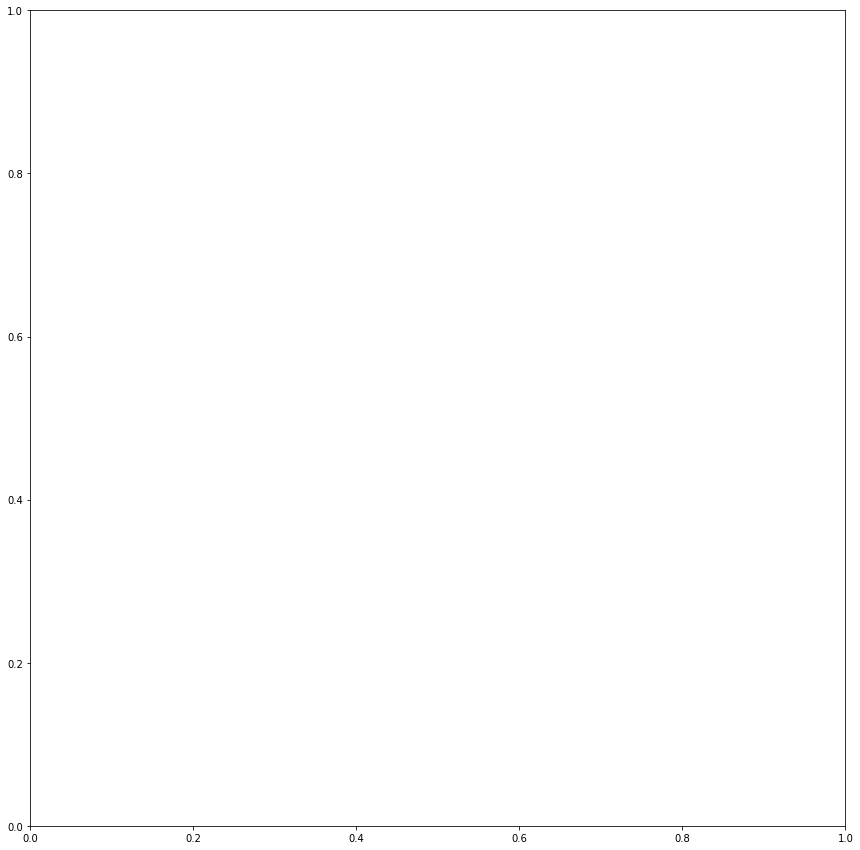

In [169]:
mo_gdf_wm = mo_gdf.to_crs({'init' :'epsg:3857'}).dropna() #Преобразуем в карту Москвы
mo_gdf_wm.plot(column = 'Вид деятельности', linewidth=0.5, cmap='', legend=True, figsize=[15,15])

In [163]:
mo_gdf_wm=mo_gdf_wm.reset_index(drop=True)

In [190]:
dictt={62: 'Разработчики (62)', 63: 'Веб-аналитики и аналитики данных (63)', 69: 'Юристы и бухгалтеры (69)', 70: 'Менеджмент и управленческий консалтинг (70)', 71: 'Архитектура и инжиниринг (71)', 73: 'Реклама (73)', 74: "Дизайн"}
mo_gdf_wm['Вид деятельности']=None
for i in range (0, 132):
    mo_gdf_wm['Вид деятельности'][i]=dictt.get(int(mo_gdf_wm['Max'][i]))

In [185]:
mo_gdf_wm=mo_gdf_wm.reset_index(drop=True)

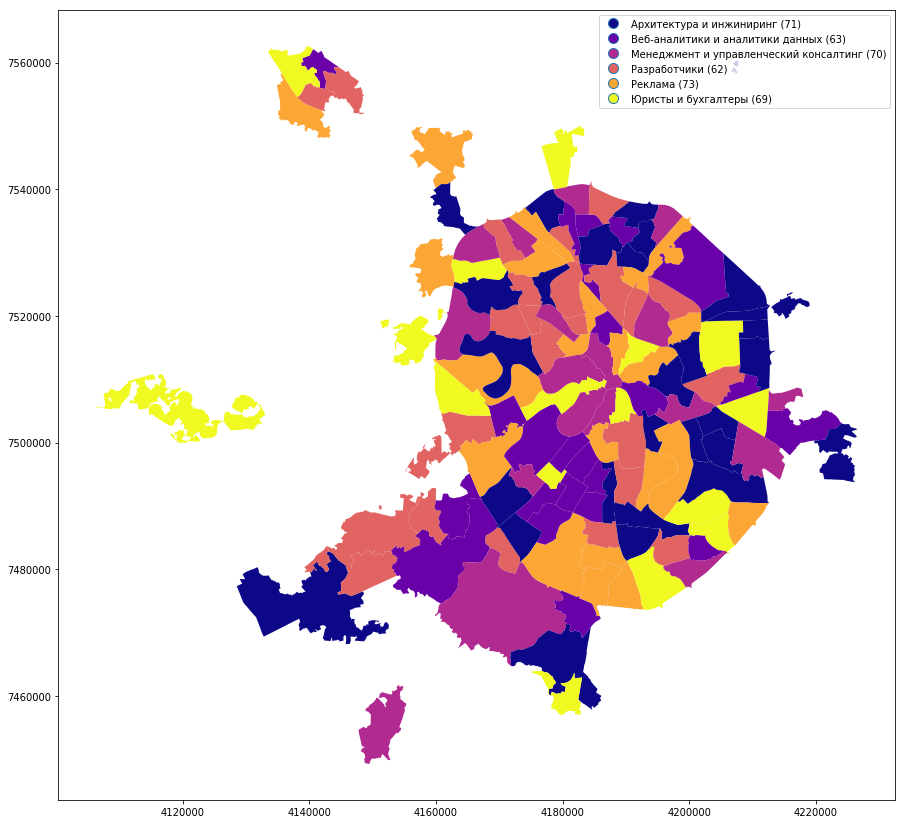

In [227]:
fig, ax = plt.subplots(figsize  = (15, 15))
mo_gdf_wm.plot(column='Вид деятельности', linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15], ax=ax)